In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers, Sequential

In [11]:
BATCH_SIZE = 30
IMAGE_SIZE = 100
data_dir = os.path.join('data/')
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
class_names = train_ds.class_names
print(class_names)

Found 4106 files belonging to 3 classes.
Using 3285 files for training.
Found 4106 files belonging to 3 classes.
Using 821 files for validation.
['onion', 'orange', 'unknown']


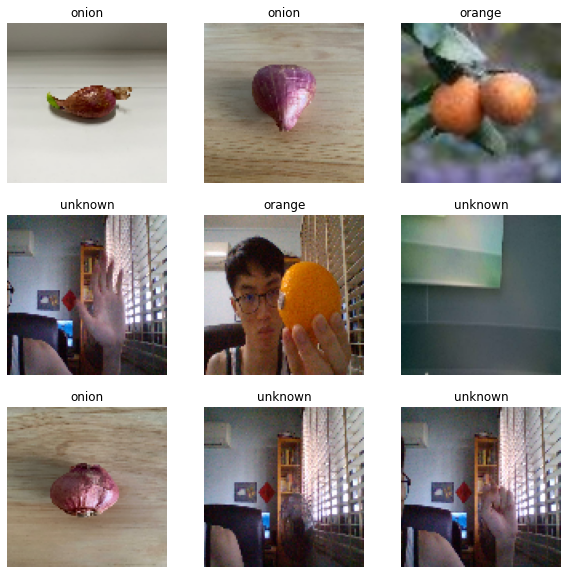

(30, 100, 100, 3)
(30,)


In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()
for image_batch, labels_batch in train_ds:
  print(image_batch.shape) # batch of 32 images shape of (180x180x3)(RGB)
  print(labels_batch.shape)
  break

In [13]:
#normaliszation-train
normalization_layer=tf.keras.layers.Rescaling(1./255)
train_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(train_ds))
first_image=image_batch[0]
#Notice pixal values are between 0 and 1
print(np.min(first_image),np.max(first_image))

#normaliszation-valid
normalization_layer=tf.keras.layers.Rescaling(1./255)
val_ds=val_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(val_ds))
first_image=image_batch[0]
#Notice pixal values are between 0 and 1
print(np.min(first_image),np.max(first_image))

0.0 1.0
0.0 1.0


In [14]:
# RGB channel are [0, 255], this standardise values to [0, 1]
normalization_layer = layers.Rescaling(1./255)

AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
# Create the model
# The Sequential model consists of three convolution blocks(tf.keras.layers.Conv2D) with a max pooling layer(tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy—the goal of this tutorial is to show a standard approach.
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
# compiling and optimizer
# To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.
model.compile(
	optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])

In [17]:
# train model
history = model.fit(
	train_ds,
	validation_data = val_ds,
	epochs = 13
)
model.summary()


Epoch 1/13


2022-06-28 14:43:16.721656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


110/110 [==============================] - ETA: 0s - loss: 0.2211 - accuracy: 0.9218

2022-06-28 14:43:23.868865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


110/110 [==============================] - 9s 73ms/step - loss: 0.2211 - accuracy: 0.9218 - val_loss: 0.0505 - val_accuracy: 0.9866
Epoch 2/13
110/110 [==============================] - 4s 41ms/step - loss: 0.0690 - accuracy: 0.9802 - val_loss: 0.0318 - val_accuracy: 0.9890
Epoch 3/13
110/110 [==============================] - 4s 39ms/step - loss: 0.0462 - accuracy: 0.9845 - val_loss: 0.0247 - val_accuracy: 0.9903
Epoch 4/13
110/110 [==============================] - 4s 38ms/step - loss: 0.0279 - accuracy: 0.9884 - val_loss: 0.0413 - val_accuracy: 0.9854
Epoch 5/13
110/110 [==============================] - 4s 39ms/step - loss: 0.0335 - accuracy: 0.9906 - val_loss: 0.0286 - val_accuracy: 0.9866
Epoch 6/13
110/110 [==============================] - 4s 38ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0195 - val_accuracy: 0.9927
Epoch 7/13
110/110 [==============================] - 4s 39ms/step - loss: 0.0205 - accuracy: 0.9924 - val_loss: 0.0438 - val_accuracy: 0.9878
Epoch 8/13

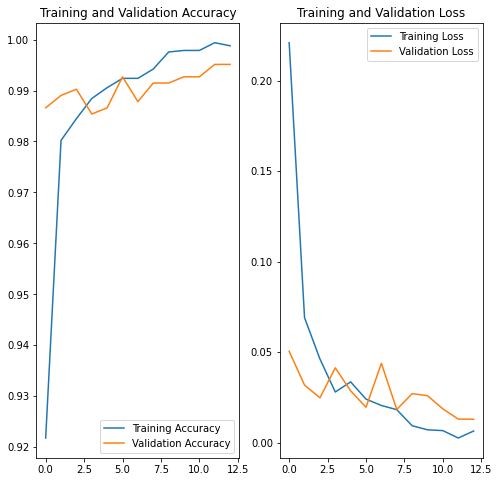

Testing model:
28/28 [==============================] - 0s 13ms/step - loss: 0.0129 - accuracy: 0.9951


In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(13)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Testing model:")
model.evaluate(val_ds)
tf.keras.models.save_model(model, 'model.hdf5')